#### Этап 1. Исследовательский анализ (EDA)

In [17]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

Загрузка датасета ингридиентов

In [18]:
ingredients_df = pd.read_csv('data/ingredients.csv')
ingredients_df.head(3)

,id,ingr
0,1,cottage cheese
1,2,strawberries
2,3,garden salad


In [19]:
print('Количество ингридиентов:', ingredients_df.shape[0])

Количество ингридиентов: 555


In [20]:
ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      555 non-null    int64 
 1   ingr    555 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.8+ KB


In [21]:
ingredients_df.value_counts('ingr')

ingr
deprecated       4
vegetable oil    1
tuna salad       1
artichokes       1
zucchini         1
                ..
wine             1
wraps            1
yam              1
yogurt           1
black beans      1
Name: count, Length: 552, dtype: int64

Стоит удалить deprecated ингредиенты и блюда, в которых они используются?

In [22]:
dep_ingr_ids = ingredients_df.loc[ingredients_df['ingr'] == 'deprecated', 'id'].to_list()

In [23]:
ingredients_df = ingredients_df[~ingredients_df['id'].isin(dep_ingr_ids)].reset_index(drop=True)

In [24]:
print('Количество ингридиентов:', ingredients_df.shape[0])

Количество ингридиентов: 551


Загрузка датасета блюд

In [25]:
dishes_df = pd.read_csv('data/dish.csv')
dishes_df.head(3)

,dish_id,total_calories,total_mass,ingredients,split
0,dish_1561662216,300.794281,193.0,ingr_0000000508;ingr_0000000122;ingr_000000002...,test
1,dish_1561662054,419.438782,292.0,ingr_0000000312;ingr_0000000026;ingr_000000002...,train
2,dish_1562008979,382.936646,290.0,ingr_0000000448;ingr_0000000520;ingr_000000046...,test


In [26]:
print('Количество блюд:', dishes_df.shape[0])

Количество блюд: 3262


In [27]:
dep_dish_ids = []
for i, row in dishes_df.iterrows():
    ingredients = [int(item.split('_')[1]) for item in row['ingredients'].split(';')]
    for ingr in dep_ingr_ids:
        if ingr in ingredients:
            dep_dish_ids.append(row['dish_id'])
            break

In [28]:
dishes_df = dishes_df[~dishes_df['dish_id'].isin(dep_dish_ids)].reset_index(drop=True)

In [29]:
print('Количество блюд:', dishes_df.shape[0])

Количество блюд: 3231


In [30]:
dishes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dish_id         3231 non-null   object 
 1   total_calories  3231 non-null   float64
 2   total_mass      3231 non-null   float64
 3   ingredients     3231 non-null   object 
 4   split           3231 non-null   object 
dtypes: float64(2), object(3)
memory usage: 126.3+ KB


In [31]:
some_dishes_df = dishes_df.sample(n=5)

Калорийность блюда: 292.022888
Масса блюда: 124.0
Список игредиентов:
['cheese pizza', 'beef', 'onions', 'shallots', 'olive oil', 'vinegar', 'salt', 'spinach (cooked)', 'millet', 'bok choy']
(640, 480)


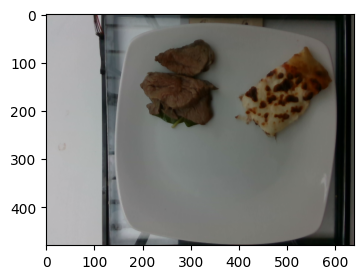

---
Калорийность блюда: 362.641998
Масса блюда: 294.0
Список игредиентов:
['olives', 'bell peppers', 'carrot', 'grilled chicken', 'cherry tomatoes']
(640, 480)


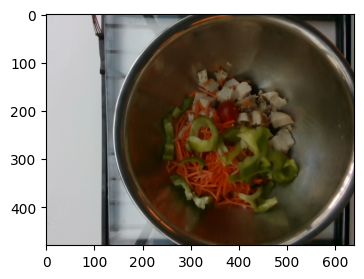

---
Калорийность блюда: 450.666016
Масса блюда: 312.0
Список игредиентов:
['scrambled eggs', 'sausage', 'egg whites']
(640, 480)


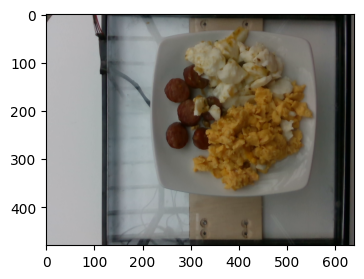

---
Калорийность блюда: 16.0
Масса блюда: 64.0
Список игредиентов:
['cauliflower']
(640, 480)


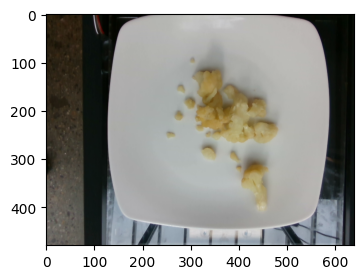

---
Калорийность блюда: 346.819672
Масса блюда: 275.0
Список игредиентов:
['scrambled eggs', 'brussels sprouts', 'mixed greens', 'raspberries', 'blackberries', 'olive oil', 'salt', 'granola', 'pepper', 'vinaigrette']
(640, 480)


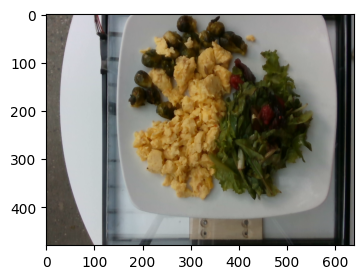

---


In [32]:
for i, row in some_dishes_df.iterrows():
    dish_id = row['dish_id']
    calories = row['total_calories']
    print('Калорийность блюда:', calories)
    mass = row['total_mass']
    print('Масса блюда:', mass)
    ingredients = row['ingredients'].split(';')
    ingredients_ids = [int(item.split('_')[1]) for item in ingredients]
    print('Список игредиентов:')
    print(ingredients_df.loc[ingredients_df['id'].isin(ingredients_ids)]['ingr'].to_list())
    
    img = Image.open(os.path.join('data/images', dish_id, 'rgb.png'))
    print(img.size)
    
    plt.figure(figsize=(20, 3))
    plt.imshow(np.array(img))
    plt.show()
    print('-' * 3)

#### Этап 2. Пайплайн обучения

#### Этап 3. Обучение модели

#### Этап 4. Валидация качества